# Problem Statement :-

### Given a customer-level data of a leading telecom firm which contains information of customers with some attributes. Design a predictive model to identify the customers which are at high risk of churn i.e. customers which are more likely to cancel subscription of the telecom company.

# Objective :-

### In the telecom industry, customers are able to choose from various service providers and can switch from one operator to other. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate, therefore, it is very important for the companies to retain their customers. The cost of retaining an existing customer is far less than acquiring a new one. This model will help the companies to know the factors which are significant in customer churn so they can work on them. This model will help the company to retain their existing customers.

In [208]:
# importing important libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [177]:
# loading dataset
data = pd.read_csv("telecom_churn.csv")

In [178]:
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### Data cleaning and EDA part is done in R. Here, we will prepare the data to fit various machine learning models on it. Then we will select which one is performing the best.

In [179]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

# Numerical and Categorical Variables :-

In [180]:
# list of numericals columns
numeric_columns = ["Account length", "Number vmail messages", "Total day minutes", "Total day calls", "Total day charge", "Total eve minutes", "Total eve calls", "Total eve charge", "Total night minutes", "Total night calls", "Total night charge", "Total intl minutes", "Total intl calls", "Total intl charge", "Customer service calls"]
# list of categorical columns
categorical_columns = ["State", "Area code", "International plan", "Voice mail plan", "Churn"]
# target variable
target = ["Churn"]

numeric_data = data[numeric_columns]
categorical_data = data[categorical_columns]


# Correlation of numeric variables

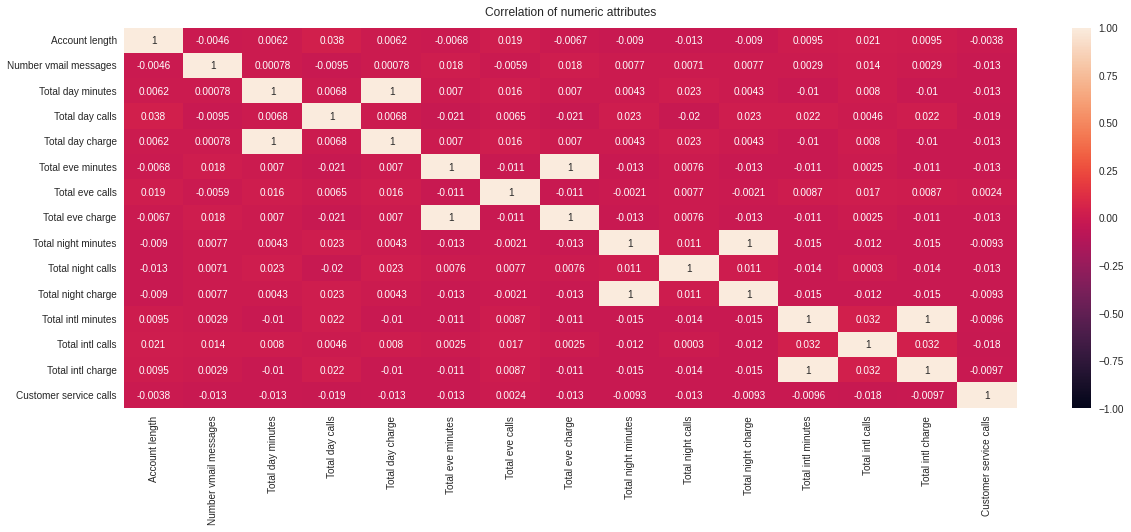

In [181]:
# Correlation between numerical variables :-
plt.figure(figsize=(20, 7))
heatmap = sns.heatmap(numeric_data.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation of numeric attributes', fontdict={'fontsize':12}, pad=12);

### We can see that there are certain attributes with correlation of 1. Total minutes and total charge is perfectly correlated, regardless whether it is day calls, evening calls, night calls. or international calls.We can drop these attributes.

# Treating multicollinearity :-

In [182]:
numeric_data.drop(columns=["Total day minutes", "Total eve minutes", "Total night minutes", "Total intl minutes"], axis=1, inplace=True)

Text(0.5, 1.0, 'Correlation of numeric attributes')

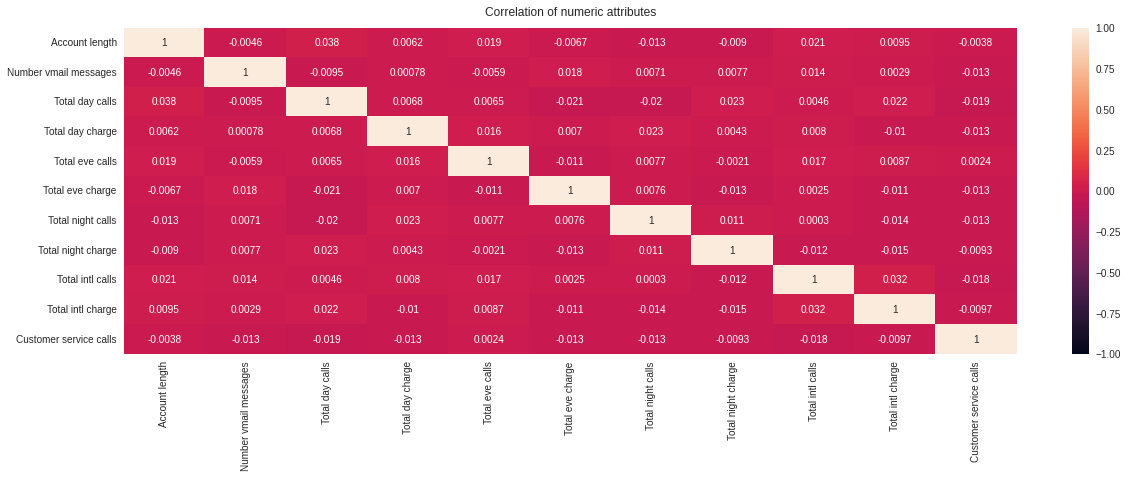

In [183]:
plt.figure(figsize=(20, 6))
heatmap = sns.heatmap(numeric_data.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation of numeric attributes', fontdict={'fontsize':12}, pad=12)

# Scaling numeric attributes

#### Since the values of numerical columns are at different scale, we should bring them at simillar scale otherwise the columns which are having high values or are at higher scale will dominate while fitting the model and we will not get accurate results.

In [184]:
scaler = StandardScaler()         # use to scale the dataframe
numeric_data = pd.DataFrame(scaler.fit_transform(numeric_data) , columns = numeric_data.columns)

In [185]:
numeric_data.head()

,Account length,Number vmail messages,Total day calls,Total day charge,Total eve calls,Total eve charge,Total night calls,Total night charge,Total intl calls,Total intl charge,Customer service calls
0,0.676489,1.234883,0.476643,1.567036,-0.055940,-0.070427,-0.465494,0.866029,-0.601195,-0.085690,-0.427932
1,0.149065,1.307948,1.124503,-0.334013,0.144867,-0.107549,0.147825,1.059390,-0.601195,1.241169,-0.427932
2,0.902529,-0.591760,0.675985,1.168464,0.496279,-1.573900,0.198935,-0.755571,0.211534,0.697156,-1.188218
3,-0.428590,-0.591760,-1.466936,2.196759,-0.608159,-2.743268,-0.567714,-0.078806,1.024263,-1.306401,0.332354
4,-0.654629,-0.591760,0.626149,-0.240041,1.098699,-1.037939,1.067803,-0.276562,-0.601195,-0.045885,1.092641


# One-hot encoding nominal attributes

#### We will do one hot encoding on the nominal columns before fitting the model.

In [186]:
categorical_data.head()

,State,Area code,International plan,Voice mail plan,Churn
0,KS,415,No,Yes,False
1,OH,415,No,Yes,False
2,NJ,415,No,No,False
3,OH,408,Yes,No,False
4,OK,415,Yes,No,False


In [187]:
len(categorical_data["State"].value_counts())

51

In [188]:
list(categorical_data.columns)

['State', 'Area code', 'International plan', 'Voice mail plan', 'Churn']

In [189]:
new_category_data = categorical_data.copy(deep=True)
new_category_data.head()

,State,Area code,International plan,Voice mail plan,Churn
0,KS,415,No,Yes,False
1,OH,415,No,Yes,False
2,NJ,415,No,No,False
3,OH,408,Yes,No,False
4,OK,415,Yes,No,False


In [190]:
nominal_categories =  ['Area code', 'State']
for category in nominal_categories:
    nominal_column = categorical_data[category]
    nominal_column = nominal_column.reset_index(drop=True)           # otherwise index will become column
    dummy_columns = pd.get_dummies(nominal_column.astype(str))       # creating encoded variables
    new_category_data.drop(columns=[category], axis=1, inplace=True)   # dropping the actual variable
    new_category_data = new_category_data.reset_index(drop=True)         # otherwise index will become column
    new_category_data = pd.concat([new_category_data, dummy_columns], axis=1)   # adding newly created encoded variables

In [191]:
new_category_data.head(3)

,International plan,Voice mail plan,Churn,408,415,510,AK,AL,AR,AZ,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,No,Yes,False,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,No,Yes,False,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,No,No,False,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Label encoding ordinal values

In [192]:
# For all ordinal variables
intl_plan = {"International plan":{"No": 0, "Yes": 1}}
new_category_data = new_category_data.replace(intl_plan)            # will replace no with 0 and yes with 1
             
vm_plan = {"Voice mail plan":{"No": 0, "Yes": 1}}
new_category_data = new_category_data.replace(vm_plan)

churn = {"Churn":{False: 0, True: 1}}
new_category_data = new_category_data.replace(churn)

In [193]:
new_category_data.head(3)

,International plan,Voice mail plan,Churn,408,415,510,AK,AL,AR,AZ,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Combining numeric and categorical columns

In [194]:
new_category_data = new_category_data.reset_index(drop=True)                   # otherwise index will become column

final_data = pd.concat([numeric_data, new_category_data], axis=1)             # combining numeric and categorical columns

final_data.head(3)

,Account length,Number vmail messages,Total day calls,Total day charge,Total eve calls,Total eve charge,Total night calls,Total night charge,Total intl calls,Total intl charge,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,0.676489,1.234883,0.476643,1.567036,-0.055940,-0.070427,-0.465494,0.866029,-0.601195,-0.085690,...,0,0,0,0,0,0,0,0,0,0
1,0.149065,1.307948,1.124503,-0.334013,0.144867,-0.107549,0.147825,1.059390,-0.601195,1.241169,...,0,0,0,0,0,0,0,0,0,0
2,0.902529,-0.591760,0.675985,1.168464,0.496279,-1.573900,0.198935,-0.755571,0.211534,0.697156,...,0,0,0,0,0,0,0,0,0,0


In [195]:
final_data.shape

(3333, 68)

# Train - Test Split :-

#### For the split, we will first shuffle the data so that we can get random sample and then we will split it in almost 70:30 train-test ratio.

In [196]:
# shuffling the dataset
final_data = final_data.sample(n=len(final_data), random_state = 28)

In [197]:
final_data.head()

,Account length,Number vmail messages,Total day calls,Total day charge,Total eve calls,Total eve charge,Total night calls,Total night charge,Total intl calls,Total intl charge,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
2281,0.149065,2.184737,-2.164631,0.448010,-0.407352,0.096626,-1.027703,1.692209,-0.194831,-0.696046,...,0,0,0,0,0,0,0,0,0,0
1503,-1.106707,0.650357,-0.320723,1.042087,-0.306949,-0.747918,0.863364,0.707824,-0.601195,0.697156,...,0,0,0,0,0,0,0,0,1,0
1987,-1.056476,-0.591760,-0.221052,-0.371818,1.148901,-0.666711,0.301154,-1.230185,-0.194831,-0.019348,...,0,0,0,0,0,0,0,0,0,0
2310,1.178798,1.234883,0.077960,0.935153,0.446077,0.646507,-0.516604,0.294733,-1.007560,1.174826,...,0,0,0,0,0,0,0,0,0,0
2042,-1.257400,1.307948,-1.965290,1.047488,-0.156344,1.231191,-0.465494,-0.390821,1.430627,0.338904,...,0,0,0,0,0,0,0,0,0,0


In [198]:
# splitting in train and test
train_df = final_data.iloc[:2333,0:]
test_df = final_data.iloc[2333:,0:]

In [199]:
# shape of test and train dataset
train_df.shape,test_df.shape

((2333, 68), (1000, 68))

In [200]:
# taking the churn column as target variables
train_target = train_df["Churn"]
test_target = test_df["Churn"]

In [201]:
train_df = train_df.drop('Churn',axis=1)
test_df = test_df.drop('Churn',axis=1)

In [202]:
# shape of test and train dataset
train_df.shape,test_df.shape

((2333, 67), (1000, 67))

# Hypothesis :-

#### We are going to fit some models on the training data that we have prepared. Since this is a classification problem, we are fitting, Logistic regression, KNN, SVM, Decision Tree, Random forest and Adaboost. All the mentioned models can be used for classification problem.

#### Our initial hypothesis is that Random forest will perform better than others. We think this because in random forest, model is made up of various trees which are fully grown and then aggregate them. These trees are fitted with different set of predictors. This allows the model to learn all the observations as the trees are fully grown. The model has low bias and since we take the aggregate of trees, the variance also decreases. Therefore, this model performs better than others.

# Model Fitting and Validation :-

#### We will fit the model on training data and validate it on the validation  data. For that we will further divide our training data into train and validation data in 80:20 ratio.

In [203]:
# splitting the dataset into training and validation
X_train,X_val,y_train,y_val = train_test_split(train_df, train_target, test_size = 0.2, random_state = 28, stratify = train_target)

# 1. KNN Model :-

#### K-nearest neighbor model considers k number of data points closest to the given data point and takes the mode of them to predict the outcome.

In [204]:
neigh = KNeighborsClassifier(n_neighbors = 3)
knn_model = neigh.fit(X_train, y_train)
k_pred = knn_model.predict(X_val)

# confusion matrix
cf_matrix = confusion_matrix(y_val, k_pred)
print("\nConfusion matrix:\n", cf_matrix)
print("\nClassification Report:")
print(classification_report(y_val, k_pred))


Confusion matrix:
 [[391   7]
 [ 56  13]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.93       398
           1       0.65      0.19      0.29        69

    accuracy                           0.87       467
   macro avg       0.76      0.59      0.61       467
weighted avg       0.84      0.87      0.83       467



# 2. Logistic Regression Model :-

#### It calculates the probability of class 1 given the observations. Based on the threshold value of probability is set, it classifies the observation into class 0 or 1 in the case of two class problems.

In [205]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
predictions = logistic_model.predict(X_val)

# confusion matrix
cf_matrix = confusion_matrix(y_val, predictions)
print("\nConfusion matrix:\n",cf_matrix)
print("\nClassification Report:")
print(classification_report(y_val, predictions))


Confusion matrix:
 [[380  18]
 [ 55  14]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       398
           1       0.44      0.20      0.28        69

    accuracy                           0.84       467
   macro avg       0.66      0.58      0.59       467
weighted avg       0.81      0.84      0.82       467



# 3. SVM Model :-

#### In SVM, the data is plotted into the n-dimensional space where n is the number of features. Then we find a hyperplane of n-1 dimensions which separates the two classes. Support vectors are the closest point to the hyperplane and are decisive in finding the hyperplane.

In [207]:
svm_model = svm.SVC(kernel = 'rbf', C=50, probability=True)
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_val)

# confusion matrix
cf_matrix = confusion_matrix(y_val, svm_predictions)
print("\nConfusion matrix:\n",cf_matrix)
print("\nClassification Report:")
print(classification_report(y_val, svm_predictions))


Confusion matrix:
 [[383  15]
 [ 33  36]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       398
           1       0.71      0.52      0.60        69

    accuracy                           0.90       467
   macro avg       0.81      0.74      0.77       467
weighted avg       0.89      0.90      0.89       467



# 4. Decision Tree Model :-

#### It is a non-parameteric model which is easy to interpret. In this model, we make a split based on a condition in any predictor based on some criterion. In classification problem, based on the predictors the tree considers all the observation which are in the leaf and take the mode of them to make the prediction. 

In [209]:
dt_model = DecisionTreeClassifier(criterion = "gini", max_depth = 5, min_samples_leaf = 5)
dt_model.fit(X_train, y_train)
clf = dt_model.predict(X_val)

# confusion matrix
cf_matrix = confusion_matrix(y_val, clf)
print("\nConfusion matrix:\n",cf_matrix)
print("\nClassification Report:")
print(classification_report(y_val, clf))


Confusion matrix:
 [[382  16]
 [ 21  48]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       398
           1       0.75      0.70      0.72        69

    accuracy                           0.92       467
   macro avg       0.85      0.83      0.84       467
weighted avg       0.92      0.92      0.92       467



# 5. Random Forest Model :-

#### It fits number of decision tree classifiers on various bootstraped samples of the dataset. It then use average of all to improve the performances of those decision trees.

In [210]:
rf_model = RandomForestClassifier(n_estimators=100, max_features=0.5, oob_score=True)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_val)

# confusion matrix
cf_matrix = confusion_matrix(y_val, rf_predictions)
print("\nConfusion matrix:\n",cf_matrix)
print("\nClassification Report:")
print(classification_report(y_val, rf_predictions))


Confusion matrix:
 [[388  10]
 [ 19  50]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       398
           1       0.83      0.72      0.78        69

    accuracy                           0.94       467
   macro avg       0.89      0.85      0.87       467
weighted avg       0.94      0.94      0.94       467



In [211]:
rf_model.oob_score_        # out of bag accuracy

0.9469453376205788

In [212]:
rf_model.feature_importances_

array([2.80624607e-02, 4.23681831e-02, 3.24614267e-02, 2.41377021e-01,
       2.58236492e-02, 1.05988899e-01, 2.93745391e-02, 4.11016581e-02,
       6.47435095e-02, 6.88176248e-02, 1.33873890e-01, 7.14853427e-02,
       2.40933339e-02, 4.34849932e-03, 3.45823380e-03, 3.42636957e-03,
       5.69546019e-04, 4.20028236e-04, 8.12091071e-04, 1.88415723e-03,
       1.57074395e-03, 2.06553215e-03, 8.48618507e-04, 3.37519376e-03,
       9.56371622e-04, 1.58960104e-03, 1.22407857e-03, 9.47034221e-04,
       2.01389944e-03, 9.98929084e-04, 2.93355869e-03, 1.18698632e-03,
       1.70710958e-03, 4.43415916e-04, 4.46936273e-04, 1.64094345e-03,
       1.48207867e-03, 3.01818819e-03, 1.20620363e-03, 2.13908692e-03,
       1.37066883e-03, 3.57790238e-03, 2.95296854e-03, 1.56289668e-03,
       9.92762915e-04, 5.15856128e-04, 1.24237609e-03, 2.59095499e-03,
       6.64436323e-04, 2.53871480e-03, 1.43974839e-03, 3.34558511e-03,
       5.10654172e-04, 6.48489769e-04, 1.27718117e-03, 5.73473399e-04,
      

# 6. AdaBoost Model :-

#### In this model, several classifier trees usually weak classifiers like decision stump are created and more wightage(importance) is given to the classifier which gives less error or is able to classify a difficult observation. This helps the model to learn to classify even the difficult observations.

In [213]:
boost_model = AdaBoostClassifier()
boost_model.fit(X_train,y_train)
boost_predictions = boost_model.predict(X_val)

# confusion matrix
cf_matrix = confusion_matrix(y_val, boost_predictions)
print("\nConfusion matrix:\n",cf_matrix)
print("\nClassification Report:")
print(classification_report(y_val, boost_predictions))


Confusion matrix:
 [[376  22]
 [ 41  28]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       398
           1       0.56      0.41      0.47        69

    accuracy                           0.87       467
   macro avg       0.73      0.68      0.70       467
weighted avg       0.85      0.87      0.86       467



# Evaluating Models on Validation Data :-

## ROC & AUC Curve :-

#### Since the classes in the data is imbalanced accuracy won't give us idea of how good a model is. Instead we should look at area under curve to compare the models and find which one is better. AUC score of 0.5 means the model is average (like tossing a coin). Greater the AUC score, better is the model.

In [214]:
# predict probabilities
pred_prob1 = dt_model.predict_proba(X_val)           # array of probability of 0 and 1 for each observation in validation data
pred_prob2 = boost_model.predict_proba(X_val)
pred_prob3 = knn_model.predict_proba(X_val)
pred_prob4 = logistic_model.predict_proba(X_val)
pred_prob5 = svm_model.predict_proba(X_val)
pred_prob6 = rf_model.predict_proba(X_val)

# roc curve for all the models we have created
fpr1, tpr1, thresh1 = roc_curve(y_val, pred_prob1[:,1], pos_label=1)  # gives false positive rate, true positive rate and threshold
fpr2, tpr2, thresh2 = roc_curve(y_val, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_val, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_val, pred_prob4[:,1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_val, pred_prob5[:,1], pos_label=1)
fpr6, tpr6, thresh6 = roc_curve(y_val, pred_prob6[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_val))]
p_fpr, p_tpr, _ = roc_curve(y_val, random_probs, pos_label=1)     # will create roc curve for average model

# area under curve scores
auc_score1 = roc_auc_score(y_val, pred_prob1[:,1])      # gives roc auc scores
auc_score2 = roc_auc_score(y_val, pred_prob2[:,1])
auc_score3 = roc_auc_score(y_val, pred_prob3[:,1])
auc_score4 = roc_auc_score(y_val, pred_prob4[:,1])
auc_score5 = roc_auc_score(y_val, pred_prob5[:,1])
auc_score6 = roc_auc_score(y_val, pred_prob6[:,1])

print("ROC-AUC Score for KNN =", auc_score3)
print("ROC-AUC Score for Logistic Regression =", auc_score4)
print("ROC-AUC Score for SVM =", auc_score5)
print("ROC-AUC Score for Decision Tree =", auc_score1)
print("ROC-AUC Score for Random Forest =", auc_score6)
print("ROC-AUC Score for AdaBoost =", auc_score2)
#print(auc_score1, auc_score2, auc_score3, auc_score4, auc_score5, auc_score6)

ROC-AUC Score for KNN = 0.7174823392323938
ROC-AUC Score for Logistic Regression = 0.7845022212511835
ROC-AUC Score for SVM = 0.8488456776636808
ROC-AUC Score for Decision Tree = 0.8576396475129268
ROC-AUC Score for Random Forest = 0.871294880198092
ROC-AUC Score for AdaBoost = 0.821116451824339


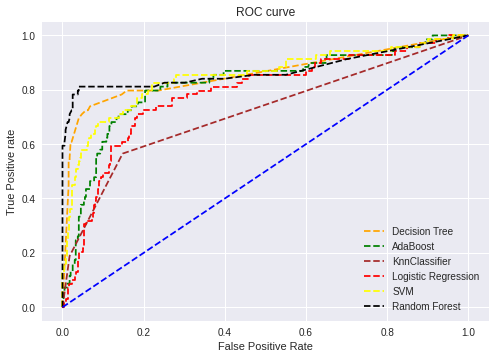

In [215]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Decision Tree')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='AdaBoost')
plt.plot(fpr3, tpr3, linestyle='--',color='brown', label='KnnClassifier')
plt.plot(fpr4, tpr4, linestyle='--',color='red', label='Logistic Regression')
plt.plot(fpr5, tpr5, linestyle='--',color='yellow', label='SVM')
plt.plot(fpr6, tpr6, linestyle='--',color='black', label='Random Forest')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

# Smote :- Testing model with handeling imbalance in data

In [216]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 0)
x_smote, y_smote = smote.fit_resample(X_train, y_train)
x_smote = pd.DataFrame(data = x_smote, columns=X_train.columns)
y_smote = pd.DataFrame(data = y_smote)

In [217]:
y_smote.value_counts()

Churn
0        1588
1        1588
dtype: int64

# KNN

In [218]:
smote_neigh = KNeighborsClassifier(n_neighbors=3)
smote_knn_model=neigh.fit(X_train, y_train)
k_pred=smote_knn_model.predict(X_val)

# confusion matrix
cf_matrix = confusion_matrix(y_val, k_pred)
print("\nConfusion matrix:\n",cf_matrix)
print("\nClassification Report:")
print(classification_report(y_val, k_pred))


Confusion matrix:
 [[391   7]
 [ 56  13]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.93       398
           1       0.65      0.19      0.29        69

    accuracy                           0.87       467
   macro avg       0.76      0.59      0.61       467
weighted avg       0.84      0.87      0.83       467



# Logistic Regression

In [219]:
smote_logistic_model=LogisticRegression()
smote_logistic_model.fit(X_train, y_train)
predictions = smote_logistic_model.predict(X_val)

# confusion matrix
cf_matrix = confusion_matrix(y_val, predictions)
print("\nConfusion matrix:\n",cf_matrix)
print("\nClassification Report:")
print(classification_report(y_val, predictions))


Confusion matrix:
 [[380  18]
 [ 55  14]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       398
           1       0.44      0.20      0.28        69

    accuracy                           0.84       467
   macro avg       0.66      0.58      0.59       467
weighted avg       0.81      0.84      0.82       467



# Random Forest

In [220]:
smote_rf_model = RandomForestClassifier(n_estimators=100, max_features=0.5, oob_score=True)
smote_rf_model.fit(X_train, y_train)
rf_predictions = smote_rf_model.predict(X_val)

# confusion matrix
cf_matrix = confusion_matrix(y_val, rf_predictions)
print("\nConfusion matrix:\n",cf_matrix)
print("\nClassification Report:")
print(classification_report(y_val, rf_predictions))


Confusion matrix:
 [[389   9]
 [ 18  51]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       398
           1       0.85      0.74      0.79        69

    accuracy                           0.94       467
   macro avg       0.90      0.86      0.88       467
weighted avg       0.94      0.94      0.94       467



# SVM

In [221]:
smote_svc = svm.SVC(kernel = 'rbf', C = 50, probability=True)
smote_svm_model = smote_svc.fit(X_train, y_train)
svm_predictions = smote_svm_model.predict(X_val)

# confusion matrix
cf_matrix = confusion_matrix(y_val, svm_predictions)
print("\nConfusion matrix:\n",cf_matrix)
print("\nClassification Report:")
print(classification_report(y_val, svm_predictions))


Confusion matrix:
 [[383  15]
 [ 33  36]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       398
           1       0.71      0.52      0.60        69

    accuracy                           0.90       467
   macro avg       0.81      0.74      0.77       467
weighted avg       0.89      0.90      0.89       467



# AdaBoost

In [222]:
smote_boost = AdaBoostClassifier()
smote_boost_model = smote_boost.fit(X_train,y_train)
abc_predictions=smote_boost_model.predict(X_val)

# confusion matrix
cf_matrix = confusion_matrix(y_val, abc_predictions)
print("\nConfusion matrix:\n",cf_matrix)
print("\nClassification Report:")
print(classification_report(y_val, abc_predictions))


Confusion matrix:
 [[376  22]
 [ 41  28]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       398
           1       0.56      0.41      0.47        69

    accuracy                           0.87       467
   macro avg       0.73      0.68      0.70       467
weighted avg       0.85      0.87      0.86       467



# Decision Tree

In [223]:
smote_clf_gini = DecisionTreeClassifier(criterion = "gini", max_depth = 5, min_samples_leaf = 5)
smote_clf_gini.fit(X_train, y_train)
clf=smote_clf_gini.predict(X_val)

# confusion matrix
cf_matrix = confusion_matrix(y_val, clf)
print("\nConfusion matrix:\n",cf_matrix)
print("\nClassification Report:")
print(classification_report(y_val, clf))


Confusion matrix:
 [[382  16]
 [ 21  48]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       398
           1       0.75      0.70      0.72        69

    accuracy                           0.92       467
   macro avg       0.85      0.83      0.84       467
weighted avg       0.92      0.92      0.92       467



In [224]:
# predict probabilities
pred_prob7 = smote_clf_gini.predict_proba(X_val)           # array of probability of 0 and 1 for each observation in validation data
pred_prob8 = smote_boost_model.predict_proba(X_val)
pred_prob9 = smote_knn_model.predict_proba(X_val)
pred_prob10 = smote_logistic_model.predict_proba(X_val)
pred_prob11 = smote_svm_model.predict_proba(X_val)
pred_prob12 = smote_rf_model.predict_proba(X_val)

# roc curve for all the models we have created
fpr7, tpr7, thresh7 = roc_curve(y_val, pred_prob7[:,1], pos_label=1)  # gives false positive rate, true positive rate and threshold
fpr8, tpr8, thresh8 = roc_curve(y_val, pred_prob8[:,1], pos_label=1)
fpr9, tpr9, thresh9 = roc_curve(y_val, pred_prob9[:,1], pos_label=1)
fpr10, tpr10, thresh10 = roc_curve(y_val, pred_prob10[:,1], pos_label=1)
fpr11, tpr11, thresh11 = roc_curve(y_val, pred_prob11[:,1], pos_label=1)
fpr12, tpr12, thresh12 = roc_curve(y_val, pred_prob12[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_val))]
p_fpr, p_tpr, _ = roc_curve(y_val, random_probs, pos_label=1)     # will create roc curve for average model

# area under curve scores
auc_score7 = roc_auc_score(y_val, pred_prob7[:,1])      # gives roc auc scores
auc_score8 = roc_auc_score(y_val, pred_prob8[:,1])
auc_score9 = roc_auc_score(y_val, pred_prob9[:,1])
auc_score10 = roc_auc_score(y_val, pred_prob10[:,1])
auc_score11 = roc_auc_score(y_val, pred_prob11[:,1])
auc_score12 = roc_auc_score(y_val, pred_prob12[:,1])

print("ROC-AUC Score for KNN =", auc_score9)
print("ROC-AUC Score for Logistic Regression =", auc_score10)
print("ROC-AUC Score for SVM =", auc_score11)
print("ROC-AUC Score for Decision Tree =", auc_score7)
print("ROC-AUC Score for Random Forest =", auc_score12)
print("ROC-AUC Score for AdaBoost =", auc_score8)

ROC-AUC Score for KNN = 0.7174823392323938
ROC-AUC Score for Logistic Regression = 0.7845022212511835
ROC-AUC Score for SVM = 0.8487000218483722
ROC-AUC Score for Decision Tree = 0.8585135824047776
ROC-AUC Score for Random Forest = 0.87031170344476
ROC-AUC Score for AdaBoost = 0.821116451824339


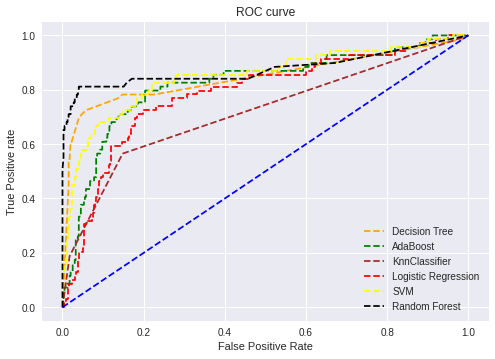

In [156]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr7, tpr7, linestyle='--',color='orange', label='Decision Tree')
plt.plot(fpr8, tpr8, linestyle='--',color='green', label='AdaBoost')
plt.plot(fpr9, tpr9, linestyle='--',color='brown', label='KnnClassifier')
plt.plot(fpr10, tpr10, linestyle='--',color='red', label='Logistic Regression')
plt.plot(fpr11, tpr11, linestyle='--',color='yellow', label='SVM')
plt.plot(fpr12, tpr12, linestyle='--',color='black', label='Random Forest')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [225]:
comp = {"KNN":[auc_score3,auc_score9], "Logistic Regression":[auc_score4,auc_score10], "SVM":[auc_score5,auc_score11], "Decision Tree":[auc_score1,auc_score7], "Random Forest":[auc_score6,auc_score12], "AdaBoost":[auc_score2,auc_score8]}

In [226]:
pd.DataFrame(comp)

,KNN,Logistic Regression,SVM,Decision Tree,Random Forest,AdaBoost
0,0.717482,0.784502,0.848846,0.857640,0.871295,0.821116
1,0.717482,0.784502,0.848700,0.858514,0.870312,0.821116


# Testing of models on Test data

### Random Forest

In [227]:
rf_predictions = rf_model.predict(test_df)

# confusion matrix
cf_matrix = confusion_matrix(test_target, rf_predictions)

print("\nConfusion matrix:\n",cf_matrix)
print("\nClassification Report:")
print(classification_report(test_target, rf_predictions))


Confusion matrix:
 [[850  14]
 [ 34 102]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       864
           1       0.88      0.75      0.81       136

    accuracy                           0.95      1000
   macro avg       0.92      0.87      0.89      1000
weighted avg       0.95      0.95      0.95      1000



### SVM

In [228]:
svm_predictions = svm_model.predict(test_df)

# confusion matrix
cf_matrix = confusion_matrix(test_target, svm_predictions)

print("\nConfusion matrix:\n",cf_matrix)
print("\nClassification Report:")
print(classification_report(test_target, svm_predictions))


Confusion matrix:
 [[830  34]
 [ 55  81]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       864
           1       0.70      0.60      0.65       136

    accuracy                           0.91      1000
   macro avg       0.82      0.78      0.80      1000
weighted avg       0.91      0.91      0.91      1000



### Adaboost

In [229]:
abc_predictions = boost_model.predict(test_df)

# confusion matrix
cf_matrix = confusion_matrix(test_target, abc_predictions)

print("\nConfusion matrix:\n",cf_matrix)
print("\nClassification Report:")
print(classification_report(test_target, abc_predictions))


Confusion matrix:
 [[824  40]
 [ 72  64]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       864
           1       0.62      0.47      0.53       136

    accuracy                           0.89      1000
   macro avg       0.77      0.71      0.73      1000
weighted avg       0.88      0.89      0.88      1000



### Decision Tree

In [230]:
clf = dt_model.predict(test_df)

# confustion matrix
cf_matrix = confusion_matrix(test_target, clf)

print("\nConfusion matrix:\n",cf_matrix)
print("\nClassification Report:")
print(classification_report(test_target, clf))


Confusion matrix:
 [[837  27]
 [ 44  92]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       864
           1       0.77      0.68      0.72       136

    accuracy                           0.93      1000
   macro avg       0.86      0.82      0.84      1000
weighted avg       0.93      0.93      0.93      1000



In [231]:
# predict probabilities
pred_prob1 = dt_model.predict_proba(test_df)           # array of probability of 0 and 1 for each observation in validation data
pred_prob2 = boost_model.predict_proba(test_df)
pred_prob3 = svm_model.predict_proba(test_df)
pred_prob4 = rf_model.predict_proba(test_df)

# roc curve for all the models we have created
fpr1, tpr1, thresh1 = roc_curve(test_target, pred_prob1[:,1], pos_label=1)  # gives false positive rate, true positive rate and threshold
fpr2, tpr2, thresh2 = roc_curve(test_target, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(test_target, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(test_target, pred_prob4[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(test_target))]
p_fpr, p_tpr, _ = roc_curve(test_target, random_probs, pos_label=1)     # will create roc curve for average model

# area under curve scores
auc_score1 = roc_auc_score(test_target, pred_prob1[:,1])      # gives roc auc scores
auc_score2 = roc_auc_score(test_target, pred_prob2[:,1])
auc_score3 = roc_auc_score(test_target, pred_prob3[:,1])
auc_score4 = roc_auc_score(test_target, pred_prob4[:,1])

print("ROC-AUC Score for SVM =", auc_score3)
print("ROC-AUC Score for Decision Tree =", auc_score1)
print("ROC-AUC Score for Random Forest =", auc_score4)
print("ROC-AUC Score for AdaBoost =", auc_score2)

ROC-AUC Score for SVM = 0.886029411764706
ROC-AUC Score for Decision Tree = 0.8749659586056644
ROC-AUC Score for Random Forest = 0.9048713235294117
ROC-AUC Score for AdaBoost = 0.8505497685185186


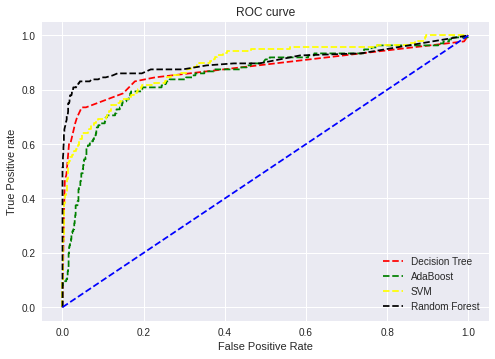

In [232]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='red', label='Decision Tree')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='AdaBoost')
plt.plot(fpr3, tpr3, linestyle='--',color='yellow', label='SVM')
plt.plot(fpr4, tpr4, linestyle='--',color='black', label='Random Forest')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show()

### Based on the ROC-AUC score and ROC curve, we found out that the Random Forest which we fitted on the data is giving us the best result on test data.